# Plotting Data with Regular Grids

In [1]:
import matplotlib.pyplot as plt
import xarray as xr

from geokube.core.datacube import from_xarray

In [2]:
air_temp = xr.tutorial.load_dataset('air_temperature')
air_temp

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## 1-D Data

In [3]:
t_1d = air_temp.isel(lat=0, lon=0, drop=True)
t_1d

<xarray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time) float32 241.2 242.1 242.3 241.9 ... 242.5 243.5 245.8 245.1
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Simple Plotting

Using `Field.plot` without additional arguments.

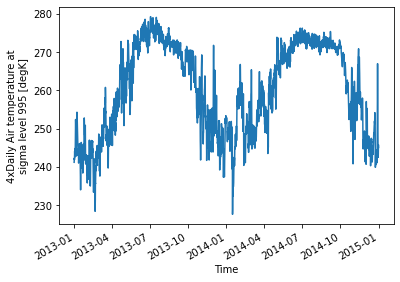

In [4]:
dcube = from_xarray(t_1d)
field = dcube['air']
field.plot()

### Passing Keyword Arguments to Matplotlib

Passing appropriate keyword arguments to `matplotlib` classes, methods, and functions.

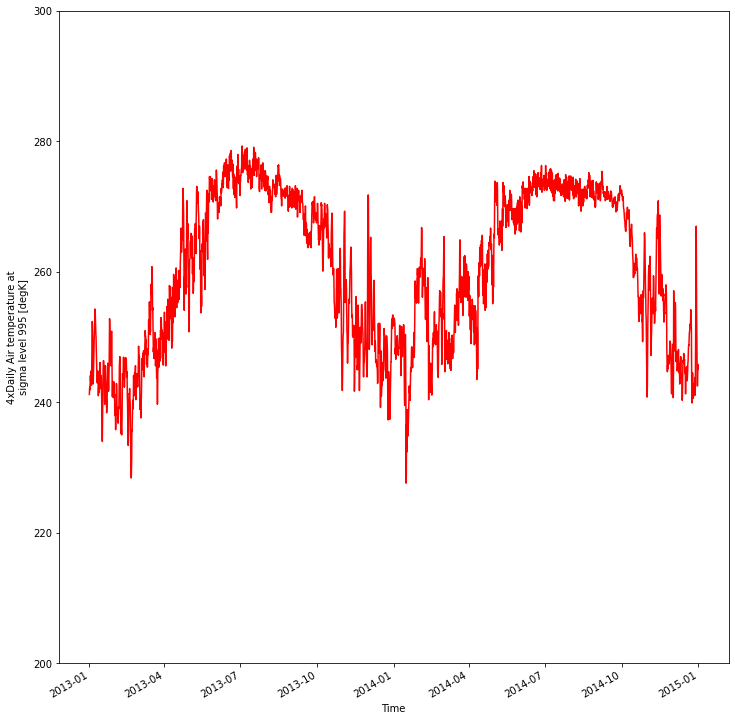

In [5]:
field.plot(figsize=(12, 12), color='red', ylim=(200, 300))

### Showing Faceted Line Plots

The parameter `hue` of [`xarray.DataArray.plot`](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.plot.html) can be used for faceted plots.

In [6]:
temp = air_temp.isel(lat=[0, -1], lon=0)
temp

<xarray.Dataset>
Dimensions:  (lat: 2, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 15.0
    lon      float32 200.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float32 241.2 296.3 242.1 296.3 ... 297.8 245.1 297.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

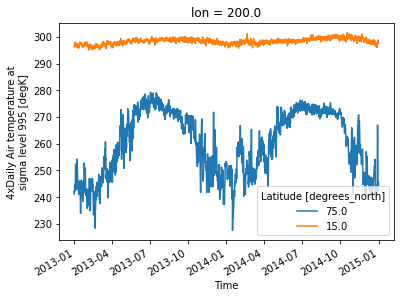

In [7]:
dcube = from_xarray(temp)
field = dcube['air']
field.plot(hue='lat')

## 2-D Data

In [8]:
t_2d = air_temp.isel(time=0, drop=True)
t_2d

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Data variables:
    air      (lat, lon) float32 241.2 242.5 243.5 244.0 ... 296.9 296.8 296.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Simple Plotting

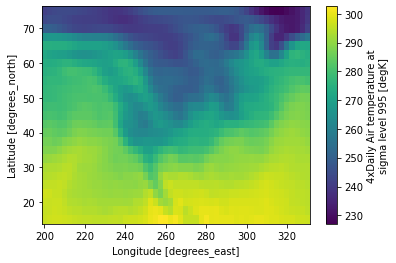

In [9]:
dcube = from_xarray(t_2d)
field = dcube['air']
field.plot()

### Passing Keyword Arguments to Matplotlib

Switching latitude and longitude.

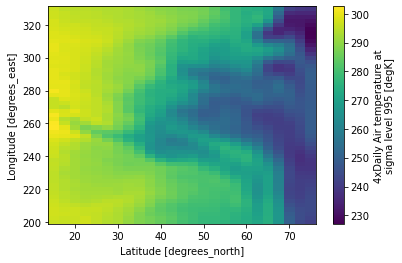

In [10]:
field.plot(x='lat', y='lon')

Specifying the color map. See the [official documentation on color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

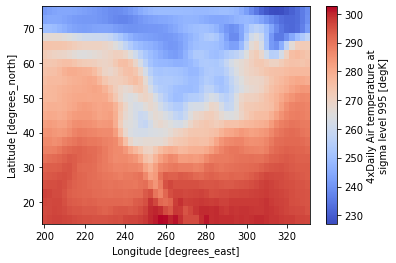

In [11]:
field.plot(cmap=plt.get_cmap('coolwarm'))

### Plotting Data between the 2nd and 98th Percentile

Sometimes it is possible to improve the visibility of the map by excluding the outliers (lower than the 2nd percentile and greater than 98th percentile) with the parameter `robust`.

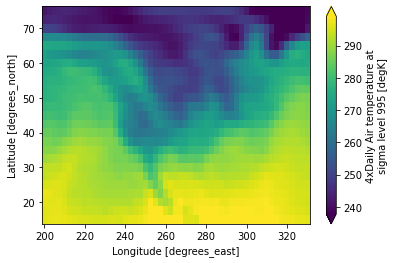

In [12]:
field.plot(robust=True)

## 3-D Data

In [13]:
t_3d = air_temp.isel(time=range(5), drop=True)
t_3d

<xarray.Dataset>
Dimensions:  (lat: 25, time: 5, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Dimensions without coordinates: time
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 297.1 297.4 297.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

By default, each image shows different time or vertical coordinate.

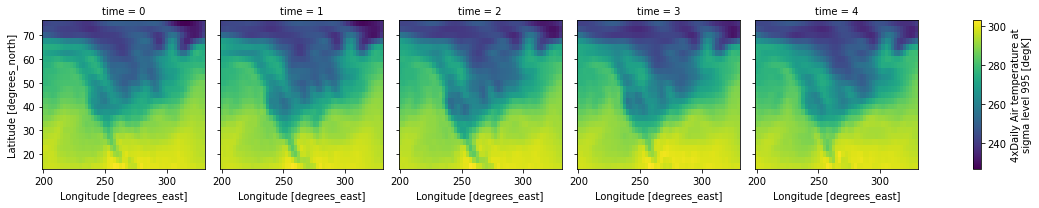

In [14]:
dcube = from_xarray(t_3d)
field = dcube['air']
field.plot()

To limit the number of images in one row, use the parameter `col_wrap` of [`xarray.DataArray.plot`](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.plot.html).

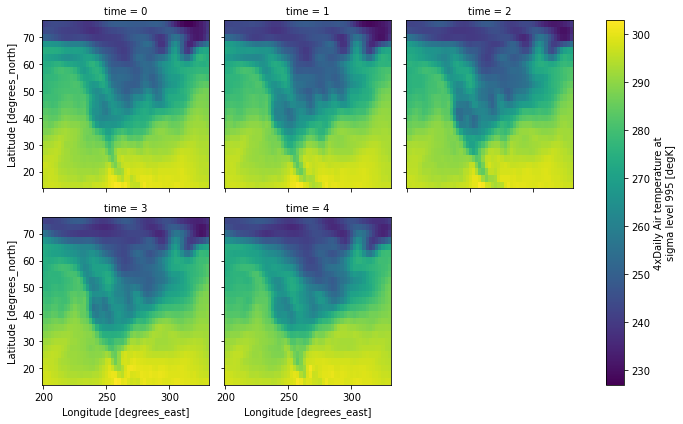

In [15]:
field.plot(col_wrap=3)